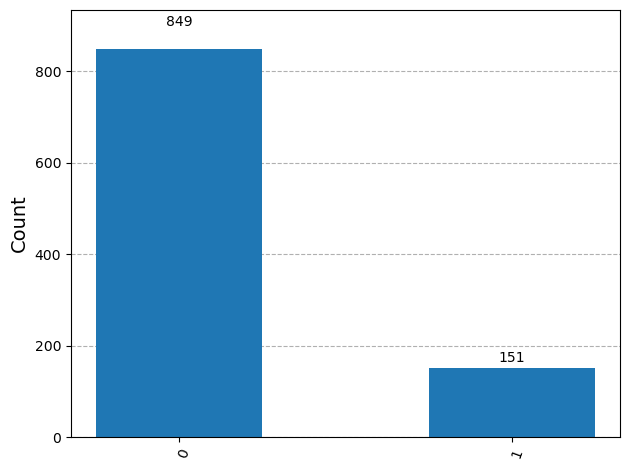

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit
from utils.ibm_lab_util import build_qc


qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")


teleportation_circuit = build_qc(qr, cr)
s, a, b = qr
c0, c1, c2 = cr
teleportation_circuit.measure(b, c2)
teleportation_circuit.draw("mpl")


import math

teleport_superposition_circuit: QuantumCircuit


# Create a circuit that has the same structure as our teleportation circuit
state_prep = QuantumCircuit(qr, cr)

# Prepare the qubit
state_prep.rx(math.pi / 4, s)

# Put a barrier across all of the wires
state_prep.barrier()
# Add the teleportation circuit to the superposition circuit
teleport_superposition_circuit = state_prep.compose(teleportation_circuit)

teleport_superposition_circuit.draw("mpl", cregbundle=False)

# %%
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
transpiled_circuit = transpile(teleport_superposition_circuit, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

# %% [markdown]
# Let's compute the distribution of just Bob's measurement by marginalizing over the other measured bits.

# %%
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_counts = marginal_counts(exp_counts, [qr.index(b)])
plot_histogram(bobs_counts)

